# Market Analysis of S&P500 Technology Companies: Visualization, Risk Assessment, and Price Prediction.

In this project, we will conduct an analysis of the stock market, focusing on some of the leading technology stocks: Apple, Amazon, Google, and Microsoft. We will use the yfinance library to acquire historical data for these stocks and leverage visualization tools such as Seaborn and Matplotlib to explore various aspects of their behavior. Additionally, we will analyze the risk associated with these stocks based on their historical performance and apply a Long Short Term Memory (LSTM) model to predict their future prices.

###  Objectives

1. **Acquire and explore historical data** for selected technology stocks using the yfinance library.
2. **Visualize different aspects of stock** performance through exploratory analysis with Seaborn and Matplotlib.
3. **Analyze the risk of the selected stocks** based on their historical performance.
4. **Predict future stock prices** using a Long Short Term Memory (LSTM) model.
5. **Enhance skills** in time series analysis within the context of the stock market.

###  Obtain and organize the data

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
import numpy as np
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [44]:
import yfinance as yf

tech_stock = ['NVDA','SNPS','CDNS','AVGO']
for stock in tech_stock:
    globals()[stock]= yf.download(stock, start='2015-01-01', end='2024-01-01')
company_list = [NVDA,SNPS,CDNS,AVGO]
company_name = ["NVIDIA", "SYNOPSYS", "CADENCE", "BROADCOM"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2015-01-02,0.503250,0.507000,0.495250,0.503250,0.483218,113680000,NVIDIA
2015-01-05,0.503250,0.504750,0.492500,0.494750,0.475056,197952000,NVIDIA
2015-01-06,0.495500,0.496000,0.479250,0.479750,0.460654,197764000,NVIDIA
2015-01-07,0.483250,0.487500,0.477000,0.478500,0.459453,321808000,NVIDIA
2015-01-08,0.484000,0.499500,0.483750,0.496500,0.476737,283780000,NVIDIA
...,...,...,...,...,...,...,...
2023-12-22,112.797997,113.199997,111.352997,112.197998,111.368568,19089000,BROADCOM
2023-12-26,112.424004,113.550003,112.302002,113.189003,112.352249,16793000,BROADCOM
2023-12-27,113.599998,113.957001,112.295998,112.616997,111.784470,20055000,BROADCOM


### Descriptive Statistics about the Data

In [45]:
NVDA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,11.130158,11.330719,10.921904,11.135663,11.106062,4.776985e+08
std,11.964349,12.168300,11.743219,11.963239,11.967055,2.599360e+08
min,0.481250,0.487500,0.473500,0.478500,0.459453,5.244800e+07
25%,2.699750,2.741000,2.659938,2.705125,2.669155,3.131220e+08
50%,5.994500,6.078625,5.911125,6.001625,5.964613,4.241760e+08
75%,15.961500,16.268876,15.571813,15.929875,15.915926,5.734422e+08
max,50.216000,50.548000,49.411999,50.409000,50.398064,3.692928e+09


In [46]:
SNPS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,178.593750,180.764779,176.423476,178.669364,178.669364,9.527069e+05
std,131.739804,133.468936,129.988206,131.750986,131.750986,7.758342e+05
min,39.980000,40.970001,39.259998,40.529999,40.529999,2.002000e+05
25%,71.692499,72.139999,71.182497,71.504997,71.504997,6.546250e+05
50%,125.305000,127.410000,123.970001,125.740002,125.740002,8.300500e+05
75%,291.402504,294.862488,286.580002,290.680008,290.680008,1.099500e+06
max,571.690002,573.770020,561.960022,568.090027,568.090027,3.029460e+07


In [47]:
CDNS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,90.195389,91.332986,89.080080,90.261462,90.261462,2.104468e+06
std,69.260535,70.142694,68.382192,69.307763,69.307763,1.733719e+06
min,16.680000,17.290001,16.520000,17.129999,17.129999,3.772000e+05
25%,31.512501,31.722500,31.270000,31.570000,31.570000,1.341900e+06
50%,65.695000,66.540001,64.920002,65.665001,65.665001,1.772300e+06
75%,147.567501,149.774998,145.035004,147.599998,147.599998,2.416975e+06
max,277.660004,279.329987,274.380005,276.570007,276.570007,5.721810e+07


In [48]:
AVGO.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,35.347619,35.791311,34.908556,35.372575,31.941848,2.810755e+07
std,20.872819,21.165753,20.641275,20.928179,21.535066,1.963598e+07
min,9.705000,9.908000,9.518000,9.625000,7.379828,4.123000e+06
25%,21.205500,21.436750,20.915000,21.204750,17.195901,1.778700e+07
50%,27.666500,27.957500,27.285000,27.568000,23.666204,2.322100e+07
75%,48.340750,48.809499,47.955502,48.435499,45.119912,3.185000e+07
max,114.199997,115.181999,113.250999,114.699997,113.330956,4.350830e+08


### Time series charts

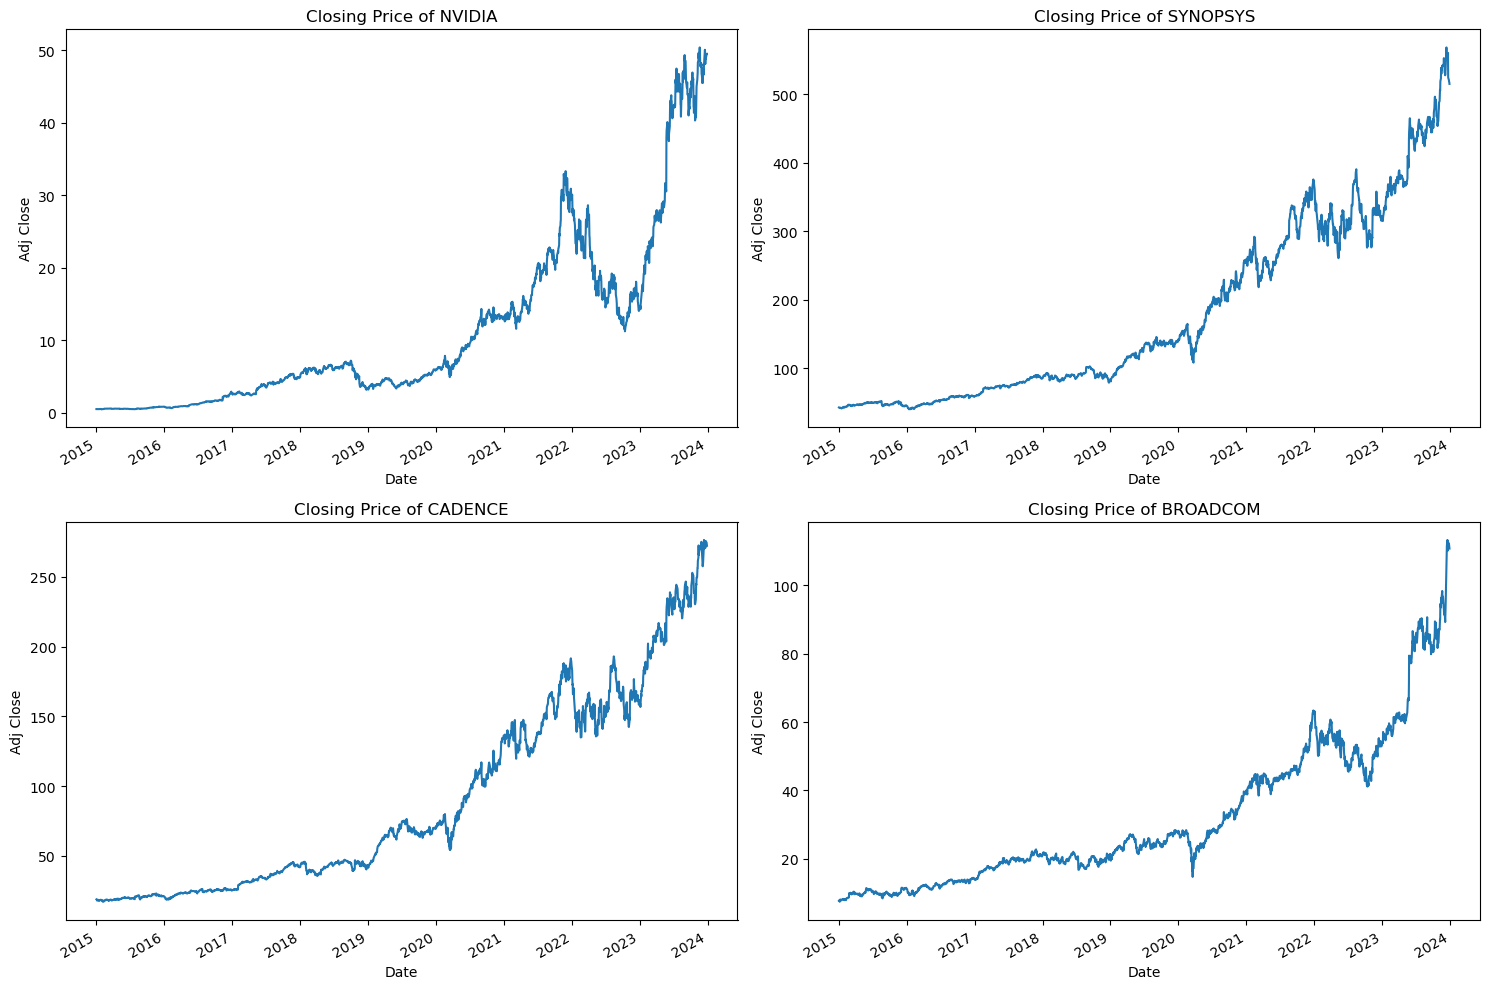

In [49]:
plt.figure(figsize=(15, 10), facecolor='white')  
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate (company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.title(f'Closing Price of {company_name[i - 1]}')     
    plt.ylabel('Adj Close', color='black')   
plt.tight_layout()

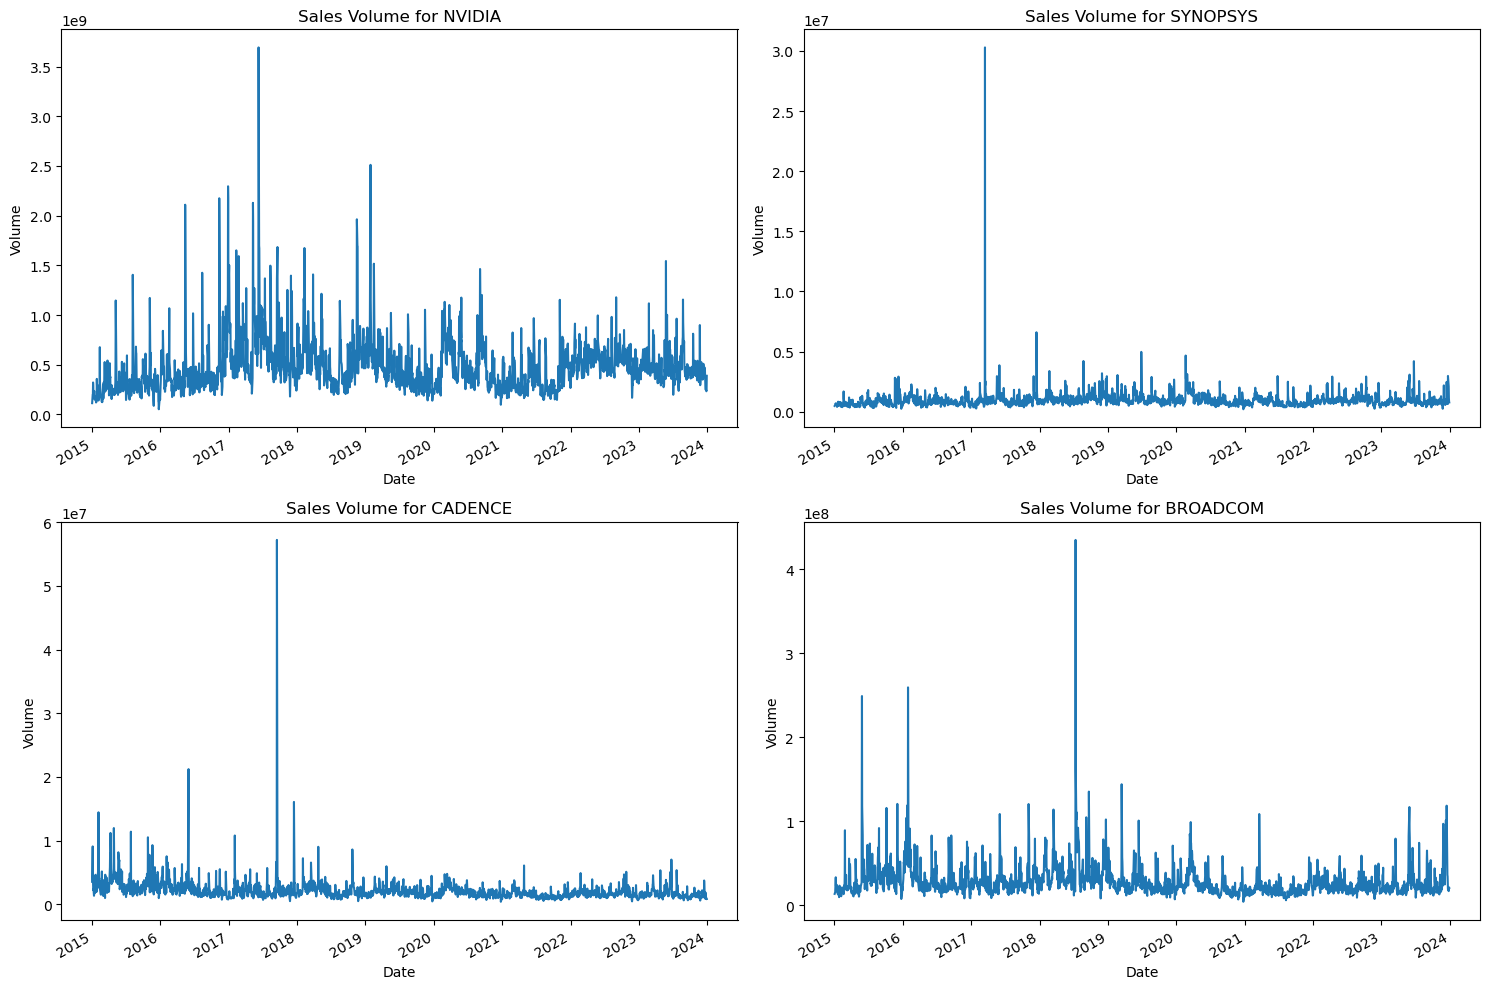

In [50]:
plt.figure(figsize=(15, 10), facecolor='white')  
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate (company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.title(f'Sales Volume for {company_name[i - 1]}')     
    plt.ylabel('Volume', color='black')   
plt.tight_layout()

### Histogram chart to see the distribution 

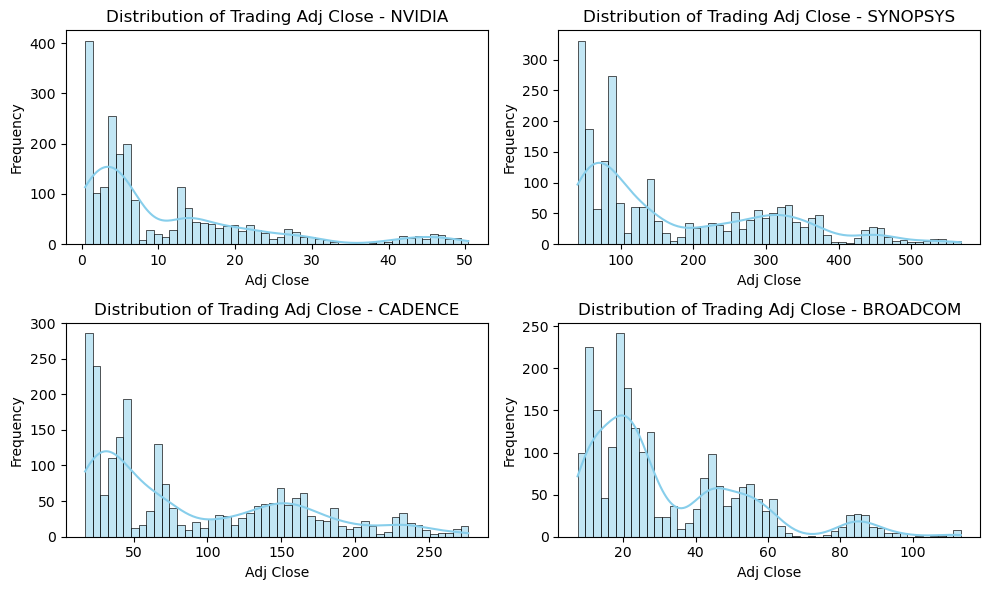

In [51]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(top=0.9, bottom=0.1)
for i, data in enumerate(company_list, 1):
    plt.subplot(2, 2, i) 
    sns.histplot(data['Adj Close'], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of Trading Adj Close - {company_name[i - 1]}')
    plt.xlabel('Adj Close')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

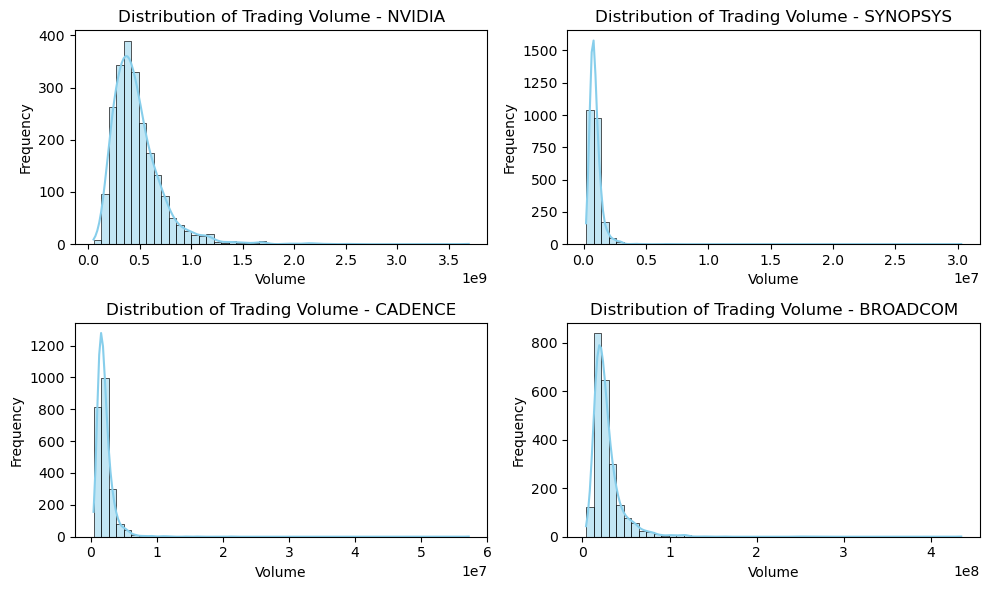

In [52]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(top=0.9, bottom=0.1)
for i, data in enumerate(company_list, 1):
    plt.subplot(2, 2, i) 
    sns.histplot(data['Volume'], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of Trading Volume - {company_name[i - 1]}')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Having completed an initial analysis, let's delve further into the data. We'll assess the risk of these stocks by focusing on their daily price fluctuations instead of just their overall values. We'll use Pandas to calculate the daily returns for stock.

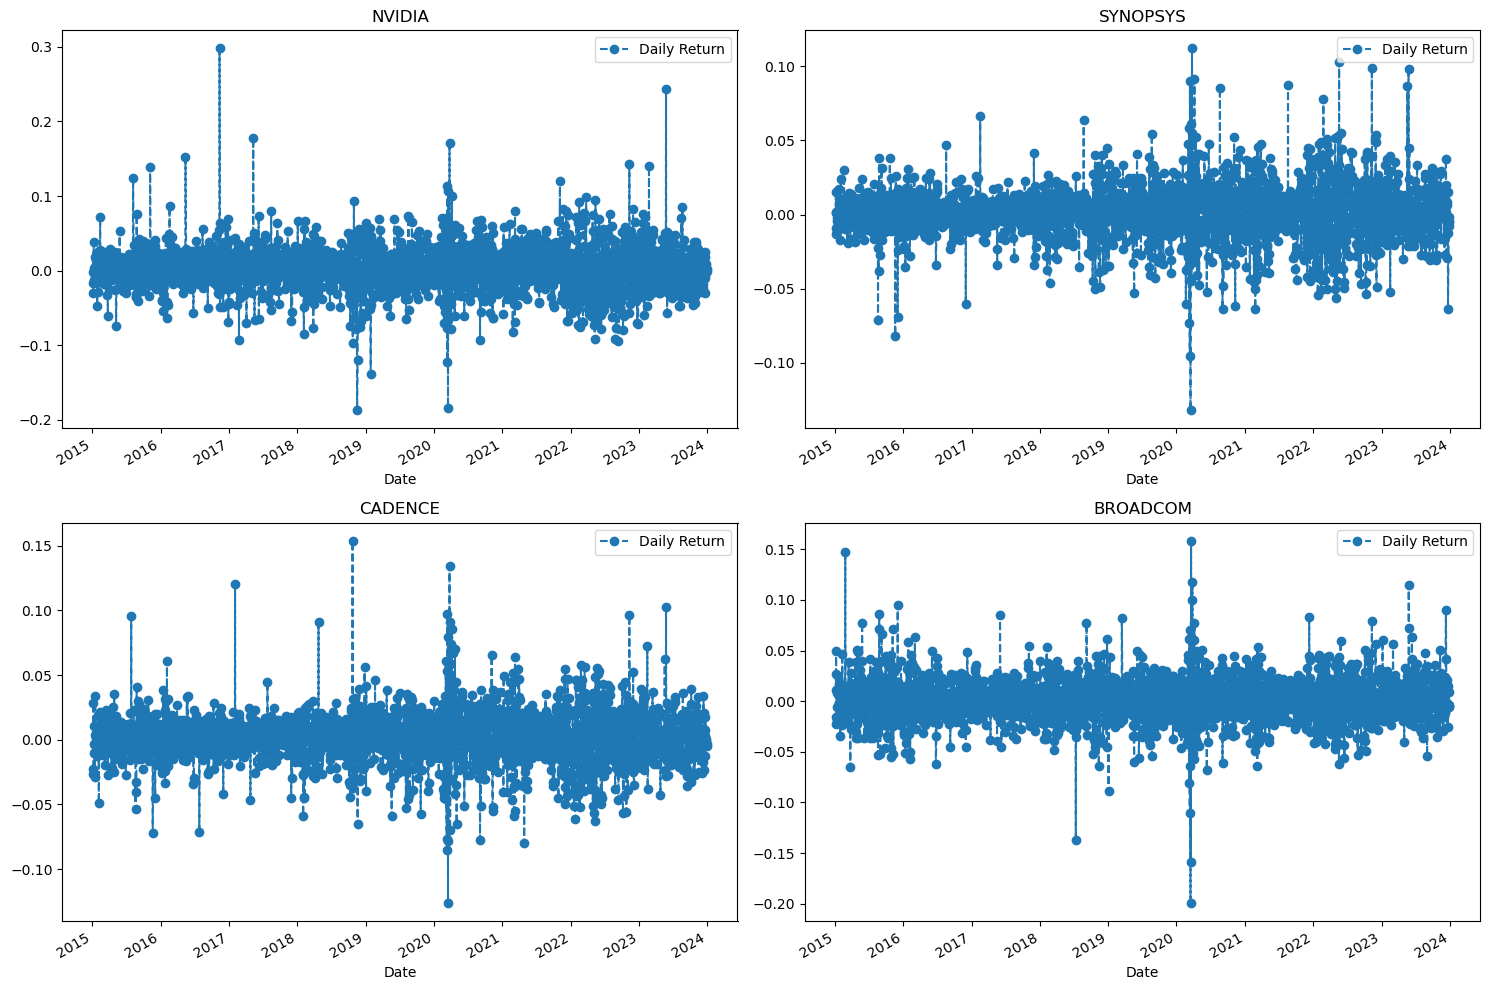

In [53]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
NVDA['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('NVIDIA')

SNPS['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('SYNOPSYS')

CDNS['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('CADENCE')

AVGO['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('BROADCOM')

fig.tight_layout()

The moving average (MA) is a basic tool used in technical analysis that helps to smooth out price data by calculating a continuously updated average price. This average is calculated over a specified time frame, such as 10 days, 20 minutes, 30 weeks, or any other period chosen by the trader.

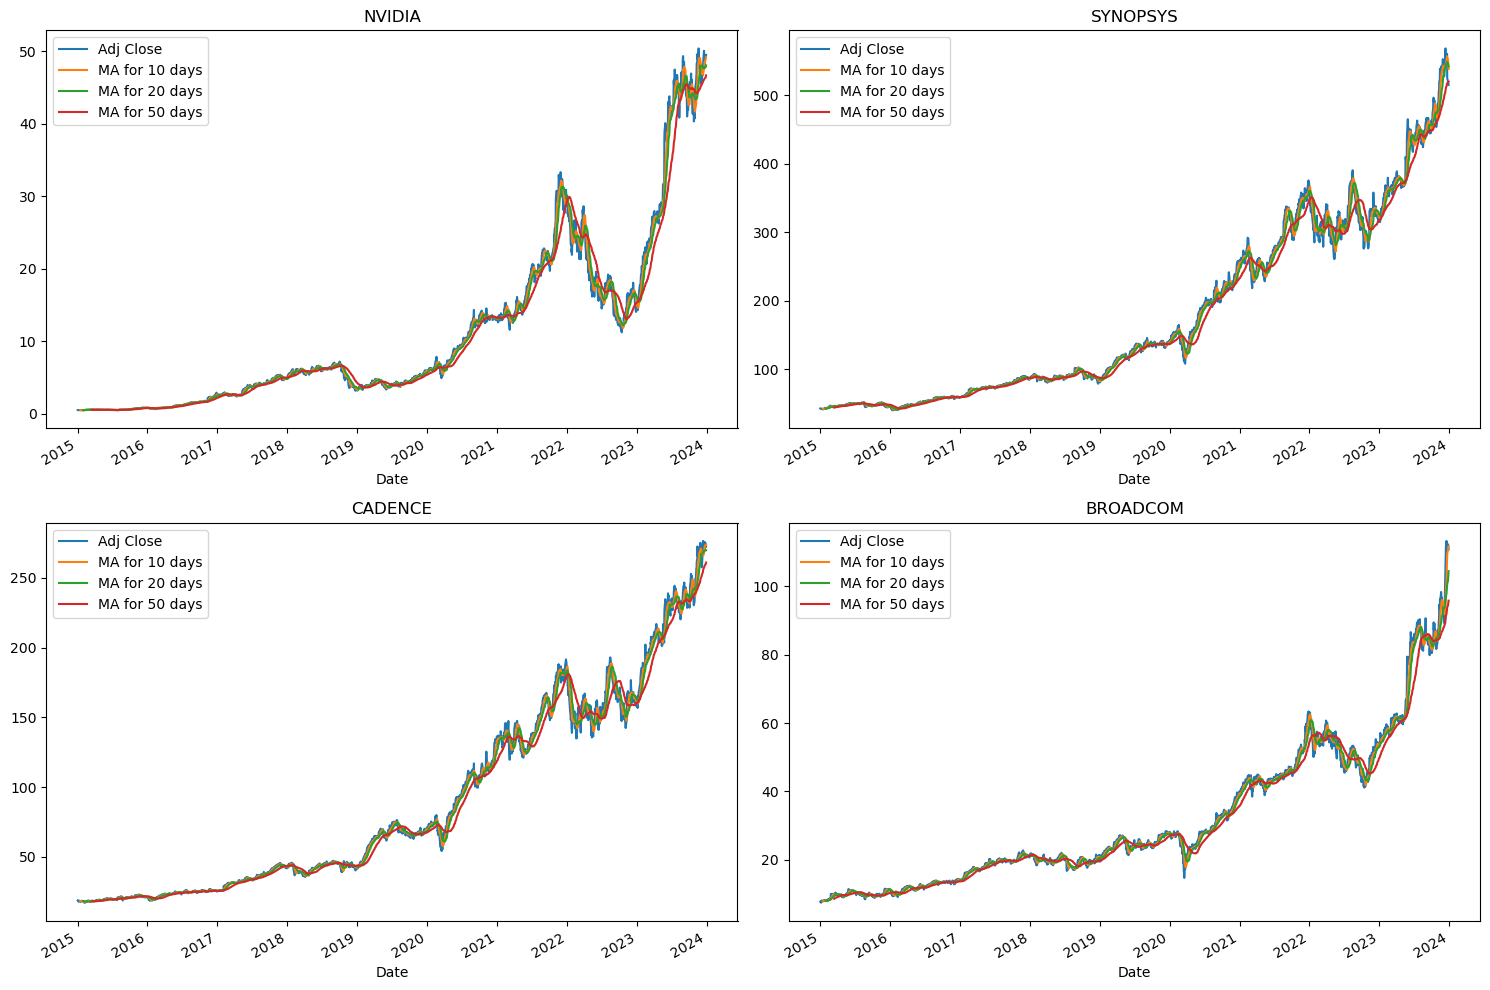

In [54]:
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('NVIDIA')

SNPS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('SYNOPSYS')

CDNS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('CADENCE')

AVGO[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('BROADCOM')

fig.tight_layout()

### See the correlation between the stocks

In [55]:
closing_df = yf.download(tech_stock, start='2015-01-01', end='2024-01-01')['Adj Close']
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AVGO,CDNS,NVDA,SNPS
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.015986,-0.022836,-0.016890,-0.012993
2015-01-06,-0.022743,-0.026630,-0.030318,-0.008933
2015-01-07,0.027013,0.028476,-0.002605,0.001186
2015-01-08,0.049975,0.010315,0.037617,0.015399


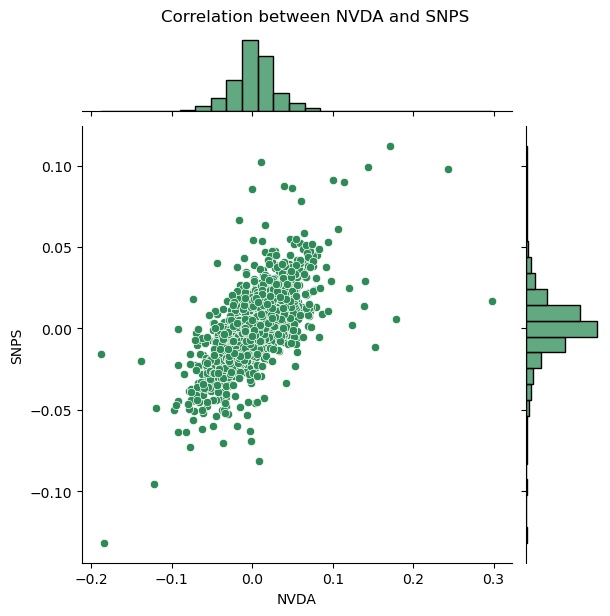

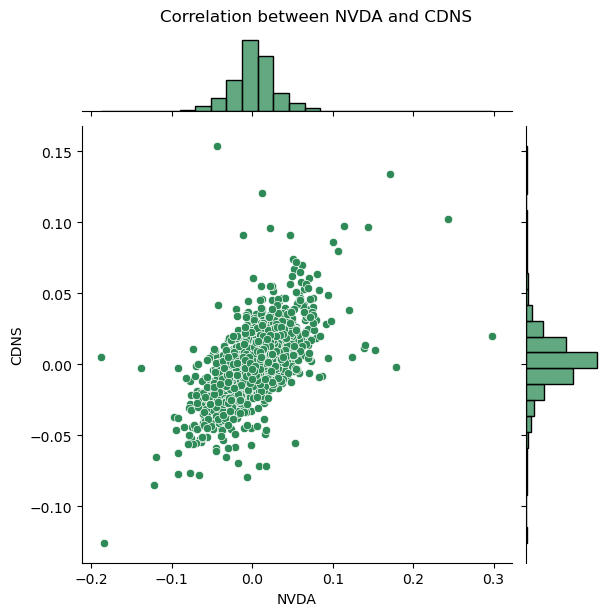

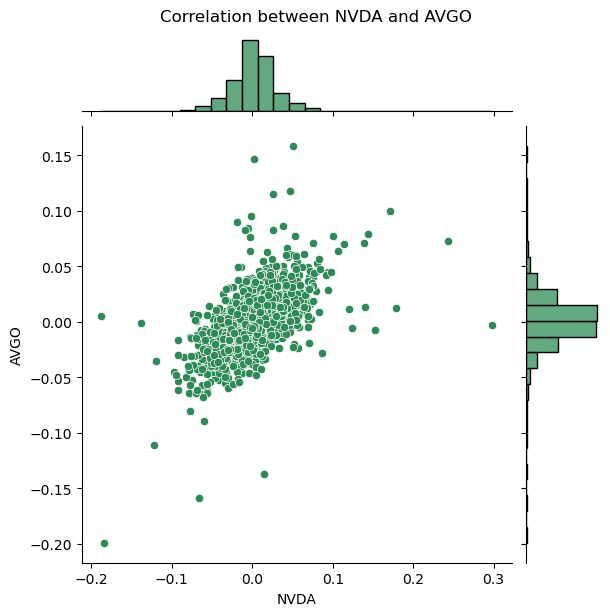

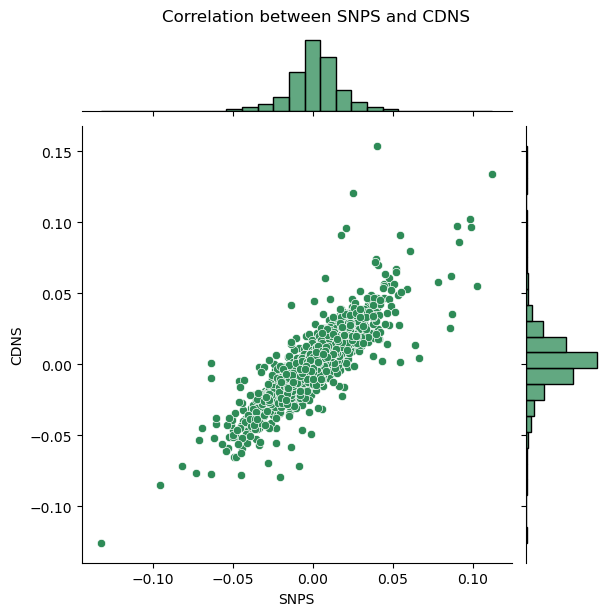

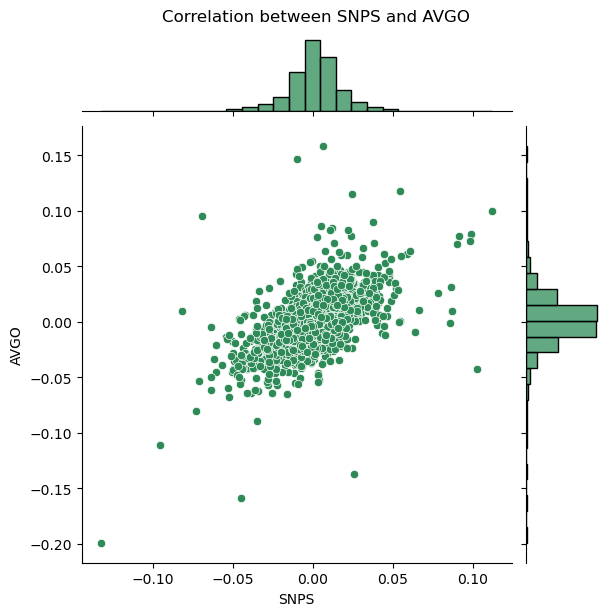

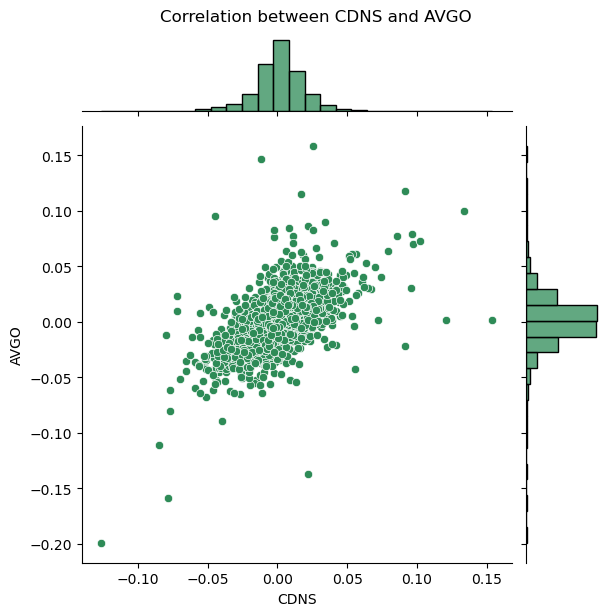

In [56]:
selected_stocks = tech_rets[['NVDA', 'SNPS', 'CDNS', 'AVGO']]
pairs = [('NVDA', 'SNPS'), ('NVDA', 'CDNS'), ('NVDA', 'AVGO'),
         ('SNPS', 'CDNS'), ('SNPS', 'AVGO'),
         ('CDNS', 'AVGO')]
for x, y in pairs:
    sns.jointplot(x=x, y=y, data=selected_stocks, kind='scatter', color='seagreen', marginal_kws=dict(bins=25, fill=True))
    plt.suptitle(f"Correlation between {x} and {y}", y=1.02)
    plt.show()

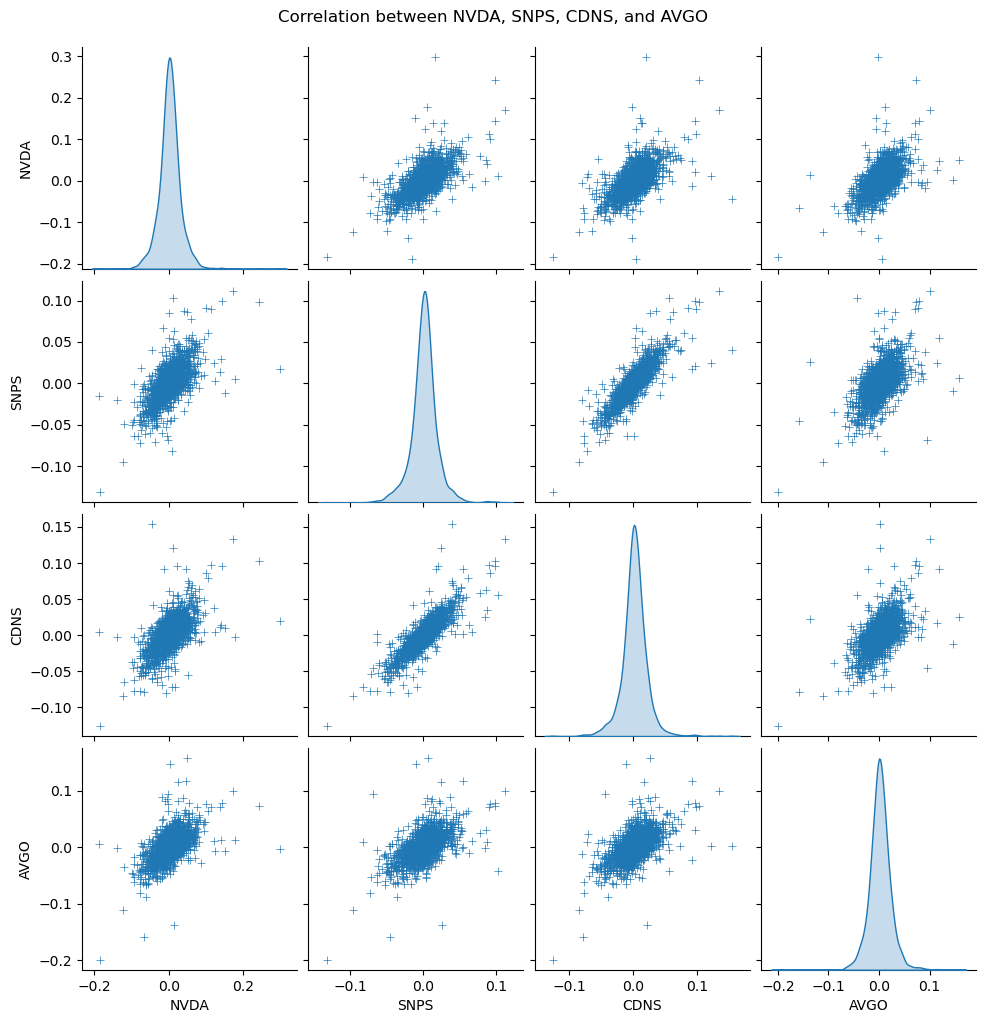

In [57]:
selected_stocks = tech_rets[['NVDA', 'SNPS', 'CDNS', 'AVGO']]
sns.pairplot(selected_stocks, kind='scatter', diag_kind='kde', markers='+')
plt.suptitle("Correlation between NVDA, SNPS, CDNS, and AVGO", y=1.02)
plt.show()

Text(0.5, 1.0, 'Correlation of stock closing price')

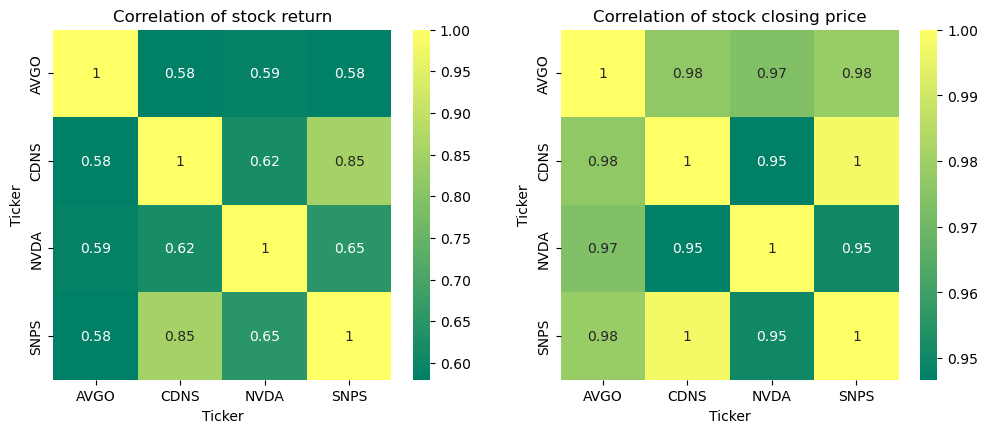

In [58]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Now, I choose one of the most important stock in the market, in this case, I choose NVIDIA, and try to predict the closing price using a LSTM model:

In [59]:
dp = yf.download('NVDA', start='2015-01-01', end='2024-01-01')
dp

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,0.503250,0.507000,0.495250,0.503250,0.483218,113680000
2015-01-05,0.503250,0.504750,0.492500,0.494750,0.475056,197952000
2015-01-06,0.495500,0.496000,0.479250,0.479750,0.460654,197764000
2015-01-07,0.483250,0.487500,0.477000,0.478500,0.459453,321808000
2015-01-08,0.484000,0.499500,0.483750,0.496500,0.476737,283780000
...,...,...,...,...,...,...
2023-12-22,49.195000,49.382999,48.466999,48.830002,48.823704,252507000
2023-12-26,48.967999,49.599998,48.959999,49.278999,49.272640,244200000
2023-12-27,49.511002,49.680000,49.084999,49.417000,49.410622,233648000


### Data Preprocessing

#### Creation of Training and Validation Sets

For training the LSTM network, we will use data from January 2015 to December 2022. For validation and prediction, we will utilize all the records from 2017.
The goal is for the LSTM network to learn how to predict the maximum stock prices for 2023, based on the behavior observed in previous years.

In [60]:
train_set = dp[:'2022'].iloc[:,1:2]
validation_set = dp['2023':].iloc[:,1:2]

In [61]:
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaler = sc.fit_transform(train_set)

In [62]:
time_step = 60
X_train = []
Y_train = []
m = len(train_set_scaler)

for i in range(time_step,m):
    X_train.append(train_set_scaler[i-time_step:i,0])
    Y_train.append(train_set_scaler[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [63]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Implementing the model in Keras 

In [70]:
dim_entrance = (X_train.shape[1],1)
dim_exit = 1
na = 50

In [71]:
model = Sequential()
model.add(LSTM(units=na, input_shape=dim_entrance))
model.add(Dense(units=dim_exit))
model.compile(optimizer='rmsprop', loss='mse')

### Stock Price Prediction

In [67]:
model.fit(X_train,Y_train,epochs=20,batch_size=32)
x_test = validation_set.values
x_test = sc.transform(x_test)
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
prediction = model.predict(X_test)
prediction = sc.inverse_transform(prediction)

Epoch 1/20
62/62 [==============================] - 1s 19ms/step - loss: 2.5201e-04
Epoch 2/20
62/62 [==============================] - 1s 18ms/step - loss: 2.5354e-04
Epoch 3/20
62/62 [==============================] - 1s 19ms/step - loss: 2.5308e-04
Epoch 4/20
62/62 [==============================] - 1s 18ms/step - loss: 2.4307e-04
Epoch 5/20
62/62 [==============================] - 1s 19ms/step - loss: 2.6235e-04
Epoch 6/20
62/62 [==============================] - 1s 19ms/step - loss: 2.3058e-04
Epoch 7/20
62/62 [==============================] - 1s 18ms/step - loss: 2.5232e-04
Epoch 8/20
62/62 [==============================] - 1s 18ms/step - loss: 2.3095e-04
Epoch 9/20
62/62 [==============================] - 1s 19ms/step - loss: 2.2555e-04
Epoch 10/20
62/62 [==============================] - 1s 19ms/step - loss: 2.2118e-04
Epoch 11/20
62/62 [==============================] - 1s 19ms/step - loss: 2.1917e-04
Epoch 12/20
62/62 [==============================] - 1s 18ms/step - loss: 

C:\Users\juang\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


6/6 [==============================] - 0s 7ms/step


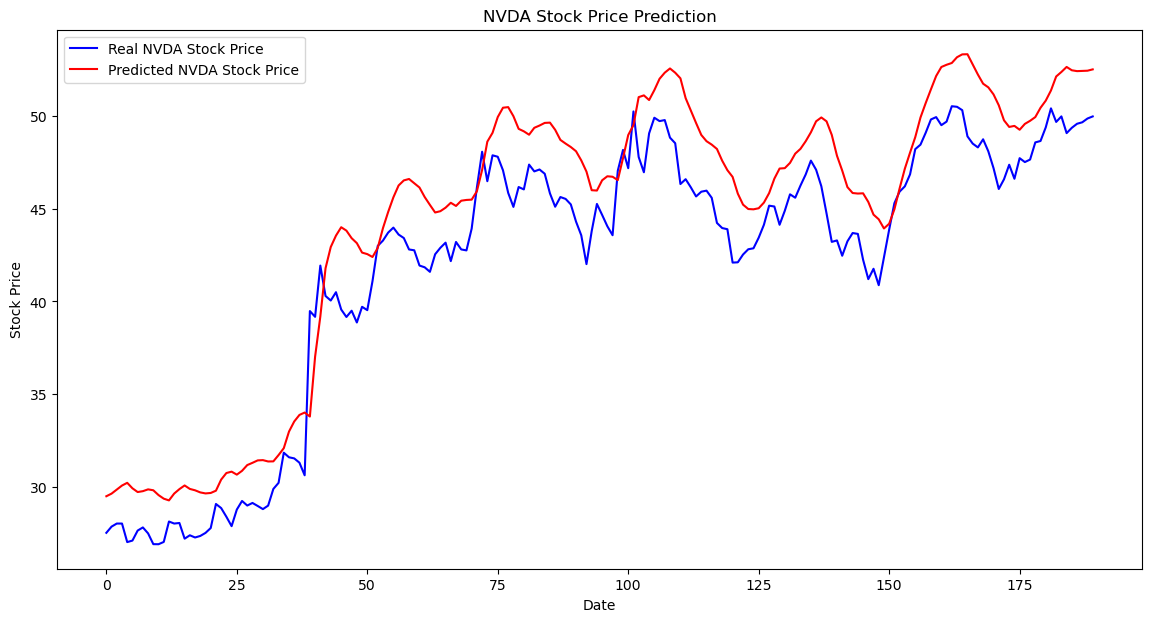

In [69]:
real_values = validation_set.values[time_step:]
results = pd.DataFrame({'Real': real_values.flatten(), 'Prediction': prediction.flatten()})
plt.figure(figsize=(14,7))
plt.plot(results['Real'], color='blue', label='Real NVDA Stock Price')
plt.plot(results['Prediction'], color='red', label='Predicted NVDA Stock Price')
plt.title('NVDA Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Conclusion

1. **Effective Use of LSTM for Stock Price Prediction:** The LSTM model successfully captured the trends in historical stock data, allowing for reasonably accurate predictions of future stock prices. This demonstrates the effectiveness of LSTM networks in time series forecasting within the stock market.

2. **Importance of Data Preprocessing:** The preprocessing steps, including scaling and the creation of training and validation sets, were crucial in ensuring that the LSTM model received clean and well-structured data. This highlights the significance of proper data preparation in machine learning projects.

3. **Model Performance and Limitations:** While the model performed well in capturing general trends, it may still have limitations in predicting short-term fluctuations or reacting to unexpected market events. This suggests that while LSTM networks are powerful, they should be used in conjunction with other methods and market knowledge for comprehensive analysis.

4. **Visualization of Results:** The visual comparison between predicted and actual stock prices provided clear insights into the model’s accuracy. Visualization is a key step in interpreting and validating model outputs.

5. **Future Work:** Future enhancements could include the integration of additional features such as trading volumes, market sentiment, or macroeconomic indicators to potentially improve the predictive power of the model. Further exploration of different model architectures and hyperparameter tuning could also lead to more refined predictions.